In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2,RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

### Import & Preprocessing

In [4]:
clover_datasets = ["datasets/clover_shaped/04clover5z-800-7-0-BI.csv", "datasets/clover_shaped/04clover5z-800-7-30-BI.csv", "datasets/clover_shaped/04clover5z-800-7-70-BI.csv"]
paw_datasets = ["datasets/paw_shaped/paw02a-800-7-0-BI.csv", "datasets/paw_shaped/paw02a-800-7-30-BI.csv", "datasets/paw_shaped/paw02a-800-7-70-BI.csv"]
datasets = clover_datasets + paw_datasets


df = pd.read_csv("datasets/paw_shaped/paw02a-800-7-0-BI.csv")
df = df.rename({'y': 'Y'}, axis=1) 
df["Y"].replace({'negative' : int(0), "positive" : int(1)}, inplace=True, regex=True)
df

,dim1,dim2,Y
0,358,400,0
1,404,387,0
2,413,295,0
3,425,431,0
4,415,294,0
...,...,...,...
795,226,635,1
796,29,72,1
797,-21,152,1
798,137,132,1


In [5]:
print(df.shape)
y = df.values[:,-1].astype(int)
X = df.drop("Y", axis=1)

(800, 3)


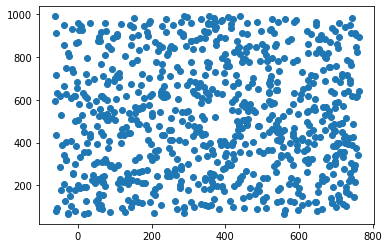

In [6]:
plt.scatter(X['dim1'], X['dim2'])

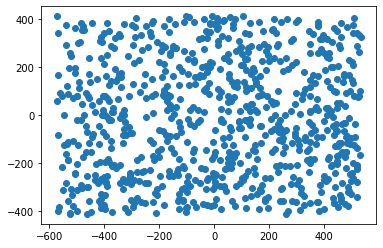

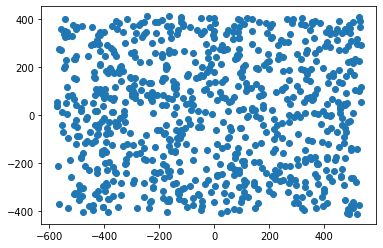

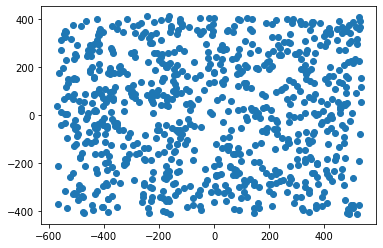

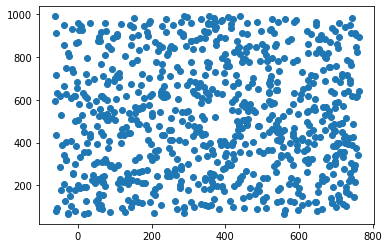

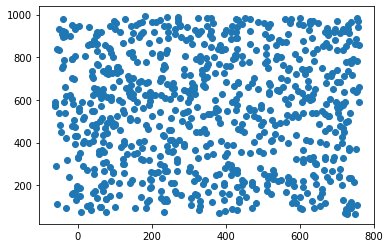

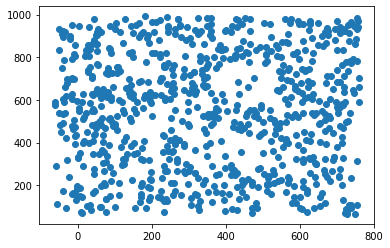

In [7]:
for source in datasets:
    df = pd.read_csv(source)
    df = df.rename({'y': 'Y'}, axis=1) 
    df["Y"].replace({'negative' : int(0), "positive" : int(1)}, inplace=True, regex=True)
    X = df.drop("Y", axis=1)

    plt.scatter(X['dim1'], X['dim2'])

    #fname = source.split("/",1)[1].split("/",1)[1].split(".",1)[0]
    #plt.savefig('plots/' + fname + '.png', facecolor='w')
    plt.show()

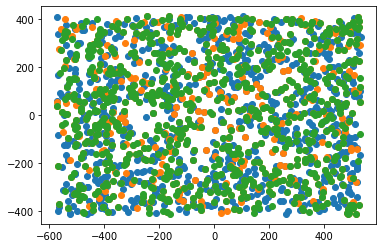

In [8]:
for source in clover_datasets:
    df = pd.read_csv(source)
    df = df.rename({'y': 'Y'}, axis=1) 
    df["Y"].replace({'negative' : int(0), "positive" : int(1)}, inplace=True, regex=True)
    X = df.drop("Y", axis=1)

    plt.scatter(X['dim1'], X['dim2'])

    fname = source.split("/",1)[1].split("/",1)[1].split(".",1)[0]
    plt.savefig('plots/' + fname + '.png', facecolor='w')

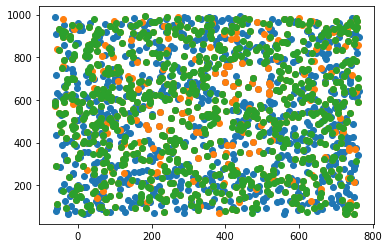

In [9]:
for source in paw_datasets:
    df = pd.read_csv(source)
    df = df.rename({'y': 'Y'}, axis=1) 
    df["Y"].replace({'negative' : int(0), "positive" : int(1)}, inplace=True, regex=True)
    X = df.drop("Y", axis=1)

    plt.scatter(X['dim1'], X['dim2'])

    fname = source.split("/",1)[1].split("/",1)[1].split(".",1)[0]
    plt.savefig('plots/' + fname + '.png', facecolor='w')

### Baseline Implementation & Model Training With all Features!!!

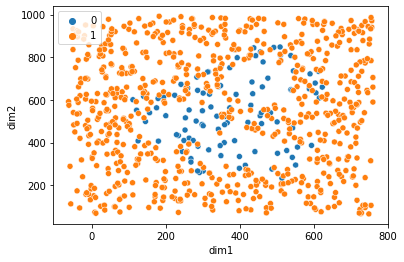

In [10]:
ax = sns.scatterplot(data = df, x='dim1', y='dim2', sizes=(20,6), palette="tab10", hue=y)
# raise the dimesion

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [12]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
def evaluate_model(X_train, y_train, X_test, y_test, model):
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	model.fit(X_train, y_train)
	return cross_val_score(model, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)

models, names = list(), list()
# KNN
models.append(KNeighborsClassifier(n_neighbors = 1))
names.append('KNN')
# RF
models.append(RandomForestClassifier(n_estimators=1000))
names.append(' RF')
# ET
models.append(ExtraTreesClassifier(n_estimators=1000))
names.append(' ET')

results = list()
for i in range(len(models)):
	scores = evaluate_model(X_train, y_train, X_test, y_test, models[i])
	results.append(scores)
	print('>%s %.3f (%.3f)' % (names[i], scores.mean(), scores.std()))

>KNN 0.833 (0.023)
> RF 0.872 (0.029)
> ET 0.867 (0.022)


In [14]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = KNeighborsClassifier(n_neighbors = 1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 22  17]
 [ 19 262]]


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.56      0.55        39
           1       0.94      0.93      0.94       281

    accuracy                           0.89       320
   macro avg       0.74      0.75      0.74       320
weighted avg       0.89      0.89      0.89       320



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


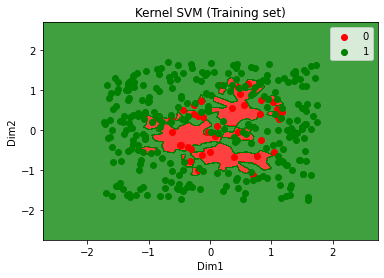

In [16]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Dim1')
plt.ylabel('Dim2')
plt.legend()
plt.show()

# Clustering

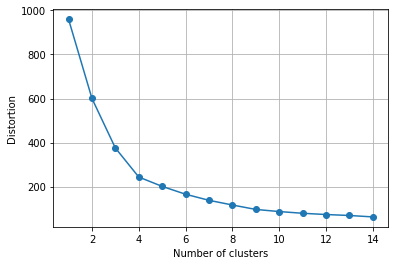

In [17]:
distortions = []
for i in range(1, 15):
    km = KMeans(n_clusters = i, init = 'random', n_init = 10, max_iter = 300, tol = 1e-04, random_state = 0)
    km.fit(X_train)
    distortions.append(km.inertia_)
# plot
plt.plot(range(1, 15), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.grid(axis="both")
plt.show()

[Text(0.5, 0, 'Dim1'), Text(0, 0.5, 'Dim2')]

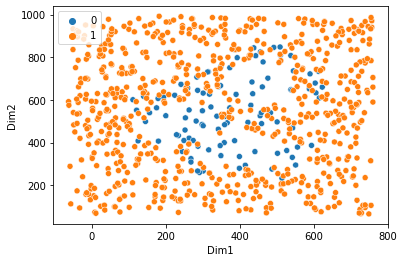

In [18]:
# Plotting with Y
ax = sns.scatterplot(data = df, x='dim1', y='dim2', sizes=(20,6), palette="tab10", hue=y)
ax.set(xlabel='Dim1', ylabel='Dim2')

[Text(0.5, 0, 'Dim1'), Text(0, 0.5, 'Dim2')]

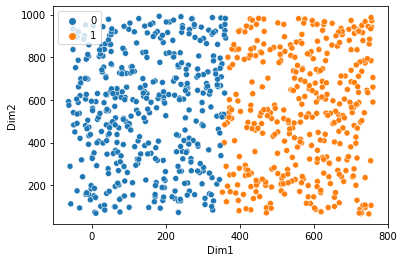

In [19]:
scaler = StandardScaler()

scaled_features = scaler.fit_transform(X)

# Coustering
kmeans = KMeans(n_clusters = 2, init = 'random', n_init = 10, max_iter = 1000, random_state = 0)
kmeans.fit(scaled_features)

ax = sns.scatterplot(data = X, x='dim1', y='dim2', hue=kmeans.labels_, palette="tab10")
ax.set(xlabel='Dim1', ylabel='Dim2')